# 1. Find, Plot, Analyze

Find histograms

Giới thiệu về Histograms
Histograms là một biểu đồ thể hiện sự phân bố cường độ của một hình ảnh có các giá trị pixel theo trục X (thường là từ 0 đến 255) và số lượng pixel tương ứng theo trục Y. Histograms cho cái nhìn trực quan về phân bố cường độ, độ tương phản, độ sáng ...

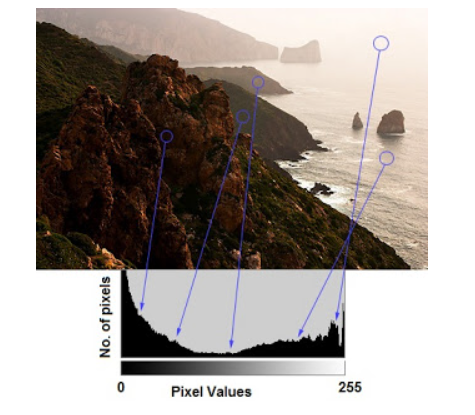

Hình ảnh ví dụ trên cho thấy nhận định khái quát về độ sáng: các giá trị cường độ bên trái nhiều và lớn hơn các giá trị cường độ bên phải cho thấy hình ảnh tối, về độ tương phản: histogram trải dài trên toàn bộ trục X cho thấy hình ảnh có độ tương phản cao.

Find histogram
1. BINS: Giá trị cường độ nằm trong khoảng 0-255 vì vậy khi biểu diễn trên biểu đồ sẽ cần 256 giá trị. Thay vì vậy, BINS làm việc với các khoảng giá trị pixels. Nếu chọn 256 bins, mỗi bin sẽ đại diện cho một giá trị duy nhất. Nếu chọn 64 bins, mỗi bin sẽ đại diện cho một khoảng 4 giá trị. --> BINS được biểu thị bằng thuật ngữ histSize trong tài liệu OpenCV
2. DIM: đại diện cho số chiều của histogram. Số chiều xác định số lượng kênh màu được sử dụng để tính toán histogram. Đối với ảnh xám, DIM là 1. Đối với ảnh màu, có thể tính toán histogram cho từng kênh màu (B, G, R) riêng biệt hoặc kết hợp chúng lại để tạo ra một histogram 3D.
3. RANGE: xác định khoảng giá trị cường độ điểm ảnh muốn tính toán histogram Thông thường, nó là [0,256], tức là tất cả các giá trị cường độ.

Text(0.5, 1.0, 'Histogram')

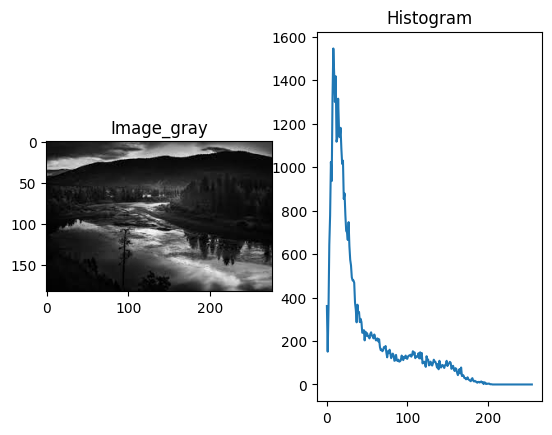

In [1]:
# hist = cv2.calcHist([images], [channels], mask/None, [histSize], ranges[..., ...])
# --> [images]: ảnh unit8 hoặc float32 để tính histogram
# --> [chanels]: kênh cần tính. Với ảnh xám thì là [0]. Với ảnh BGR thì là [0],[1],[2] tương ứng với 'B', 'G', 'R'
# --> mask: mặt na thể hiện vùng cần tính. Toàn bộ ảnh nếu dùng None
# --> [histSize]: số lượng bins
# --> range[...,...]: vùng giá trị cường độ

import cv2
import numpy as np
import matplotlib.pyplot as plt

image_gray = cv2.imread('image_histogram.jpg', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([image_gray],[0],None,[256],[0,256])

plt.subplot(121)
plt.imshow(image_gray, cmap='gray')
plt.title('Image_gray')

plt.subplot(122)
plt.plot(hist)
plt.title('Histogram')

Plotting histograms

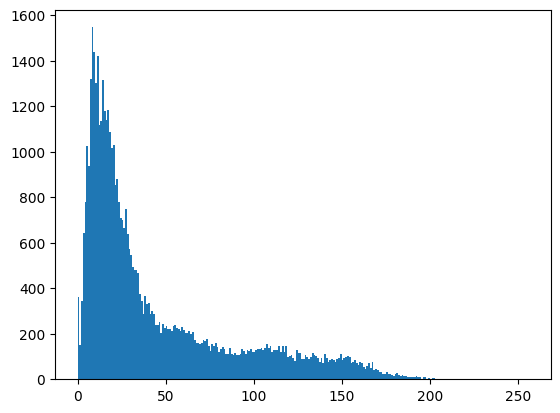

In [2]:
# matplotlib hỗ trợ hàm matplotlib.pyplot.hist() và sẽ không cần sử dụng hàm cv2.calcHist
plt.hist(image_gray.ravel(),256,[0,256])
plt.show()

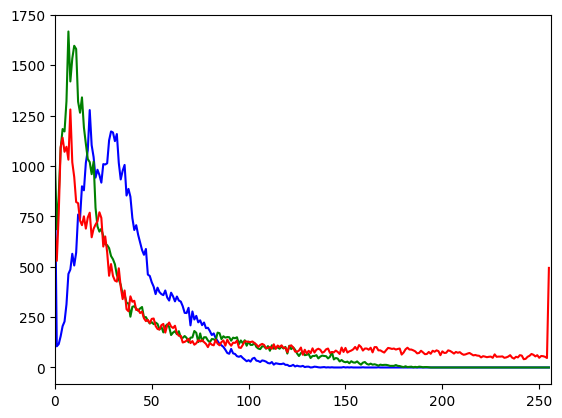

In [3]:
# matplotlib trên ba kênh màu BGR
image = cv2.imread('image_histogram.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
plt.show()

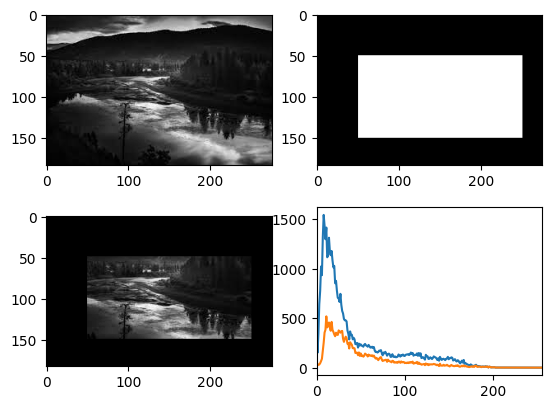

In [4]:
# Sử dụng mặt nạ OpenCV
img = cv2.imread('image_histogram.jpg',0)

mask = np.zeros(img.shape[:2], np.uint8)
mask[50:150, 50:250] = 255
masked_img = cv2.bitwise_and(img, img, mask = mask)

hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

# 2. Histogram Equalization

### Giới thiệu về cân bằng histogram
Cân bằng histogram (histogram equalization) là sự điều chỉnh histogram về trạng thái cân bằng, làm cho phân bố (distribution) giá trị pixel không bị co cụm tại một khoảng hẹp mà được "kéo dãn" ra.

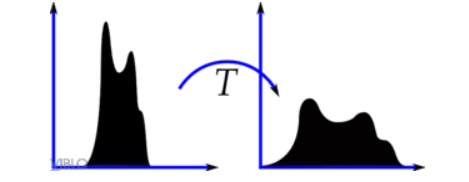

Nhiệm vụ cần thực hiện là tìm một hàm biến đổi K(i) để thay đổi giá trị tại điểm có cường độ sáng là i.

Khi thực hiện tính toán histogram ta thu được H(i). Khi đó, xây dựng hàm tích lũy Z(i) cho từng mức xám --> Z(i) = ∑(j=0->i) H(i) tức là Z(i) là tổng các H(i) có cường độ nhỏ hơn i.

Để histogram cân bằng thì Z(i) phải tăng dần đều thay vì tăng một cách đột ngột. Khi đó, ta có công thức cho K(i) = (Z(i)-minZ) / (maxZ-minZ)

Text(0.5, 1.0, 'Equalize histogram')

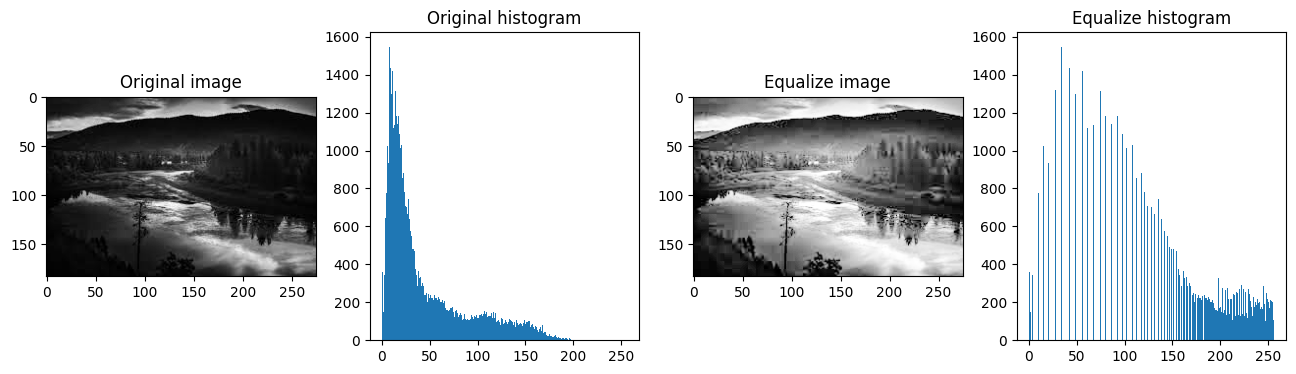

In [5]:
# cv2.equalizeHist()
image = cv2.imread('image_histogram.jpg',0)
equalize = cv2.equalizeHist(image)

plt.figure(figsize=[16,4])

plt.subplot(141); plt.imshow(image, cmap='gray'); plt.title('Original image')
plt.subplot(142);plt.hist(image.ravel(),256,[0,256]); plt.title('Original histogram')

plt.subplot(143); plt.imshow(equalize, cmap='gray'); plt.title('Equalize image')
plt.subplot(144); plt.hist(equalize.ravel(),256,[0,256]); plt.title('Equalize histogram')

### CLAHE (Contrast Limited Adaptive Histogram Equalization)
Histogram Equalization thông thường sẽ cân bằng histogram trên toàn bộ hình ảnh, có thể dẫn đến tăng cường độ tương phản quá mức và khuếch đại nhiễu. CLAHE sẽ thực hiện cân bằng histogram cục bộ với giới hạn độ tương phản, cho kết quả mượt mà hơn và ít nhiễu hơn.

Các đặc điểm chính của CLAHE:

1. Adaptive Histogram Equalization: CLAHE chia hình ảnh thành nhiều vùng nhỏ hơn (các ô hoặc tiles) và thực hiện cân bằng histogram riêng biệt trên từng vùng (tileSize mặc định là 8x8 trong OpenCV). Kết quả là, độ tương phản được cải thiện cục bộ trong từng vùng của hình ảnh.
2. Contrast Limiting: Một bước quan trọng của CLAHE là giới hạn độ tương phản. Nếu một bin trong histogram vượt quá một giá trị ngưỡng (clip limit), các giá trị cường độ điểm ảnh dư thừa sẽ được phân phối lại cho các bin khác để tránh tăng cường quá mức độ tương phản và khuếch đại tiếng ồn.
3. Interpolation: Sau khi cân bằng các histogram cục bộ, các vùng được kết hợp lại bằng cách sử dụng nội suy để đảm bảo sự chuyển tiếp mượt mà giữa các vùng.

Text(0.5, 1.0, 'Equalize CLAHE histogram')

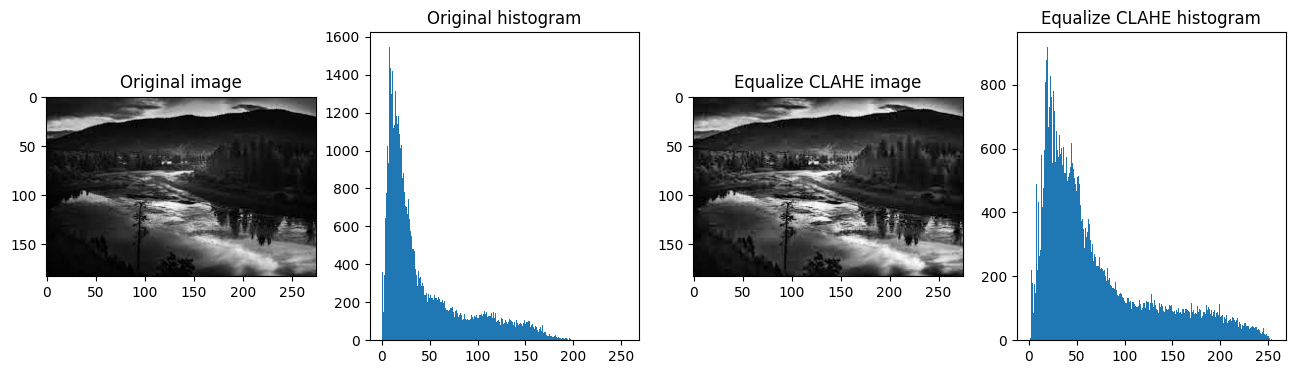

In [6]:
image = cv2.imread('image_histogram.jpg',0)

# create a CLAHE object 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # clipLimit = 2.0 có ý nghĩa nếu mỗi title có 256 điểm ảnh 
                                                           # thì contrast limiting là 2.0 * 256 / 256 = 2
clahe_image = clahe.apply(image)

plt.figure(figsize=[16,4])

plt.subplot(141); plt.imshow(image, cmap='gray'); plt.title('Original image')
plt.subplot(142);plt.hist(image.ravel(),256,[0,256]); plt.title('Original histogram')

plt.subplot(143); plt.imshow(clahe_image, cmap='gray'); plt.title('Equalize CLAHE image')
plt.subplot(144); plt.hist(clahe_image.ravel(),256,[0,256]); plt.title('Equalize CLAHE histogram')

### 2D Histogram

Nó khá đơn giản và được tính toán bằng cùng một hàm, cv.calcHist() . Đối với biểu đồ màu, chúng ta cần chuyển đổi hình ảnh từ BGR sang HSV. (Hãy nhớ rằng, đối với biểu đồ 1D, chúng ta đã chuyển đổi từ BGR sang Grayscale). Đối với biểu đồ 2D, các tham số của nó sẽ được sửa đổi như sau:

1. Channels = [0,1] vì chúng ta cần xử lý cả mặt phẳng H và S.
2. Bins = [180,256] 180 cho mặt phẳng H và 256 cho mặt phẳng S.
3. Ranges = [0,180,0,256] Giá trị sắc độ nằm giữa 0 và 180 và Độ bão hòa nằm giữa 0 và 256.

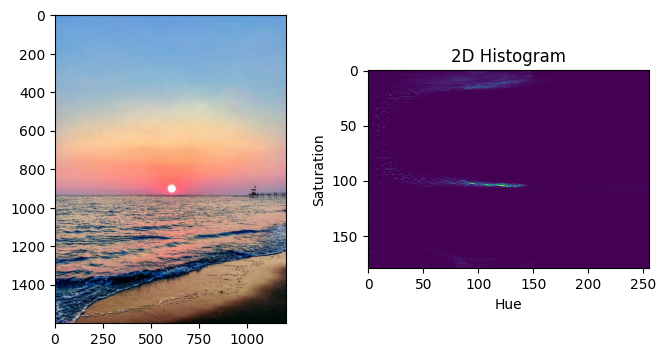

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh màu
img = cv2.imread('image_histogram_2D.jpg')

# Chuyển đổi ảnh sang không gian màu HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Tính toán histogram 2D cho kênh H và S trong không gian màu HSV
hist_2d = cv2.calcHist([hsv_img], [0, 1], None, [180, 256], [0, 180, 0, 256])

plt.figure(figsize=[8,4])
plt.subplot(121); plt.imshow(img[:,:,::-1]);
# Hiển thị histogram 2D
plt.subplot(122)
plt.imshow(hist_2d, interpolation='nearest')
plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('2D Histogram')
# plt.colorbar(label='Frequency')
plt.show()

# Backprojection in OpenCV


Backprojection trong OpenCV là một kỹ thuật quan trọng được sử dụng để phát hiện vùng của hình ảnh mà có sự tương đồng với một mẫu đã cho. Backprojection so sánh mẫu với hình ảnh và gán điểm cho mỗi điểm ảnh trong hình ảnh dựa trên sự tương đồng của nó với mẫu. Kết quả là một hình ảnh mới, thường được gọi là "map" hoặc "projection", trong đó các điểm tương đồng với mẫu có giá trị cao hơn so với các điểm không tương đồng.

Quá trình backprojection trong OpenCV thực hiện các bước sau:

1. **Xây dựng histogram của mẫu:** Sử dụng hàm cv2.calcHist() để tính toán histogram của mẫu (thường là một kênh màu hoặc một kênh màu kết hợp) trong không gian màu HSV hoặc LAB. Histogram này sẽ đại diện cho phân phối màu sắc của mẫu.
2. **Chuẩn hóa histogram của mẫu:** Chuẩn hóa histogram của mẫu để loại bỏ ảnh hưởng của độ sáng và độ tương phản. Điều này thường được thực hiện bằng cách chia mỗi giá trị trong histogram cho tổng số điểm ảnh trong mẫu.
3. **Tính toán backprojection:** Sử dụng hàm cv2.calcBackProject() để tính toán backprojection của hình ảnh dựa trên histogram của mẫu. Điều này tạo ra một hình ảnh mới, trong đó mỗi điểm ảnh đại diện cho mức độ tương đồng với mẫu dựa trên histogram của nó.
4. **Áp dụng ngưỡng (tùy chọn):** Bước này thường không bắt buộc, nhưng bạn có thể áp dụng một ngưỡng cho backprojection để chỉ lấy các điểm ảnh có giá trị cao hơn một ngưỡng nhất định. Điều này giúp tạo ra một mask hoặc highlight các vùng tương đồng đáng chú ý trong hình ảnh.
5. **Hiển thị kết quả (tùy chọn):** Cuối cùng, bạn có thể hiển thị hình ảnh backprojection hoặc kết hợp nó với hình ảnh gốc để kiểm tra vùng tương đồng.

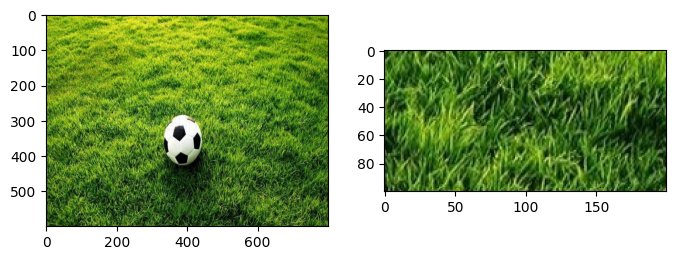

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc hình ảnh và mẫu
image = cv2.imread('backprojection.jpg')
sample = image[350:450, 500:700]

plt.figure(figsize=[8,4])
plt.subplot(121); plt.imshow(image[:,:,::-1])
plt.subplot(122); plt.imshow(sample[:,:,::-1])

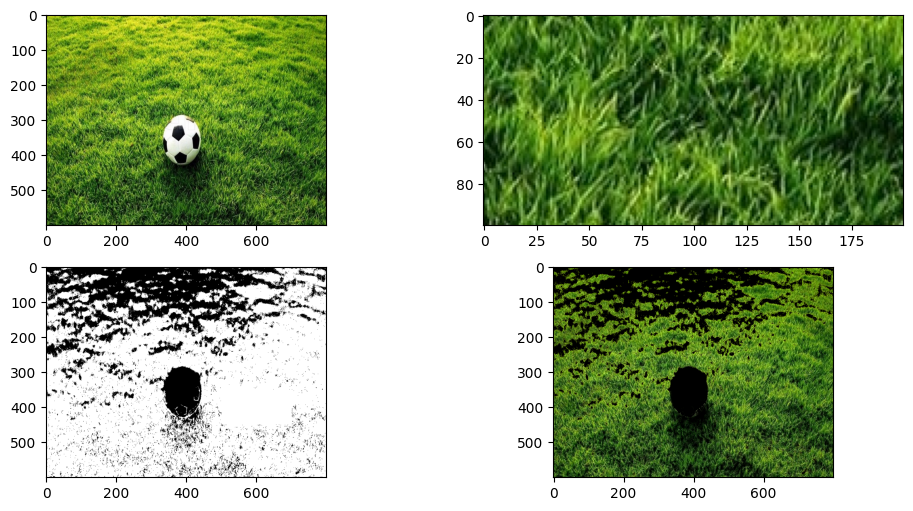

In [12]:
# Chuyển đổi hình ảnh và mẫu sang không gian màu HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
sample_hsv = cv2.cvtColor(sample, cv2.COLOR_BGR2HSV)

# Tính toán histogram của mẫu trong không gian màu HSV
hist_sample = cv2.calcHist([sample_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# Chuẩn hóa histogram của mẫu
cv2.normalize(hist_sample, hist_sample, 0, 255, cv2.NORM_MINMAX)

# Tính toán backprojection của hình ảnh dựa trên histogram của mẫu
backproj = cv2.calcBackProject([image_hsv], [0, 1], hist_sample, [0, 180, 0, 256], 1)

# Áp dụng ngưỡng 
thresh = 0
_, thresholded = cv2.threshold(backproj, thresh, 255, cv2.THRESH_BINARY)

# Ghi nhận kết quả
result = cv2.bitwise_and(image, image, mask=thresholded)

plt.figure(figsize=[12, 6])
plt.subplot(2, 2, 1)
plt.imshow(image[:,:,::-1])
plt.subplot(2, 2, 2)
plt.imshow(sample[:,:,::-1])
plt.subplot(2, 2, 3)
plt.imshow(thresholded, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(result[:,:,::-1])

plt.show()